<a href="https://colab.research.google.com/github/clauderlima/data-science/blob/main/LeilaoViatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from IPython.display import HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [215]:
leilao2019 = pd.read_excel('/content/tabelas.xlsx',sheet_name='2019')
leilao2020 = pd.read_excel('/content/tabelas.xlsx',sheet_name='2020')
leilao = pd.concat([leilao2019, leilao2020])

In [254]:
leilao.head(15)

,placa,data,marca_modelo,ano,lance_final,fipe,idade
28,JKH3233,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5400,17270.0,13
29,JKH4973,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4800,17270.0,13
30,JKH0903,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5500,17270.0,13
31,JKH3993,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4500,17270.0,13
32,JKH3343,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5900,17270.0,13
33,JKH3323,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5800,17270.0,13
34,JKH3133,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5300,17270.0,13
35,JKH3953,2019-12-13,FIAT PÁLIO HLX FLEX,2006,6200,17270.0,13
36,JKH3313,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4800,17270.0,13
37,JKH3223,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5900,17270.0,13


In [218]:
leilao = leilao[['placa', 'data', 'marca_modelo', 'ano', 'lance_final', 'fipe']]

In [219]:
leilao.head(5)

,placa,data,marca_modelo,ano,lance_final,fipe
0,JFP2426-DF,2019-12-13,AGRALE THUNDER,2003,19000,NaN
1,JHO9581-DF,2019-12-13,FIAT DOBLO CARGO,2010,11000,NaN
2,JFO3218-DF,2019-12-13,FIAT DUCATO,2003,15000,NaN
3,JFO4168-DF,2019-12-13,FIAT DUCATO,2003,13000,NaN
4,JFO3228-DF,2019-12-13,FIAT DUCATO,2003,13000,NaN


In [220]:
leilao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 384
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   placa         956 non-null    object        
 1   data          956 non-null    datetime64[ns]
 2   marca_modelo  956 non-null    object        
 3   ano           956 non-null    int64         
 4   lance_final   956 non-null    int64         
 5   fipe          783 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 52.3+ KB


In [221]:
# Remove as linhas com valores nulos
leilao.dropna(inplace=True)

In [199]:
leilao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 28 to 384
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   placa         783 non-null    object        
 1   data          783 non-null    datetime64[ns]
 2   marca_modelo  783 non-null    object        
 3   ano           783 non-null    int64         
 4   lance_final   783 non-null    int64         
 5   fipe          783 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 42.8+ KB


In [222]:
# Remove o lixo no final do nome da marca/modelo
leilao['marca_modelo'] = leilao.marca_modelo.apply(lambda x: x.replace('\xa0', ''))

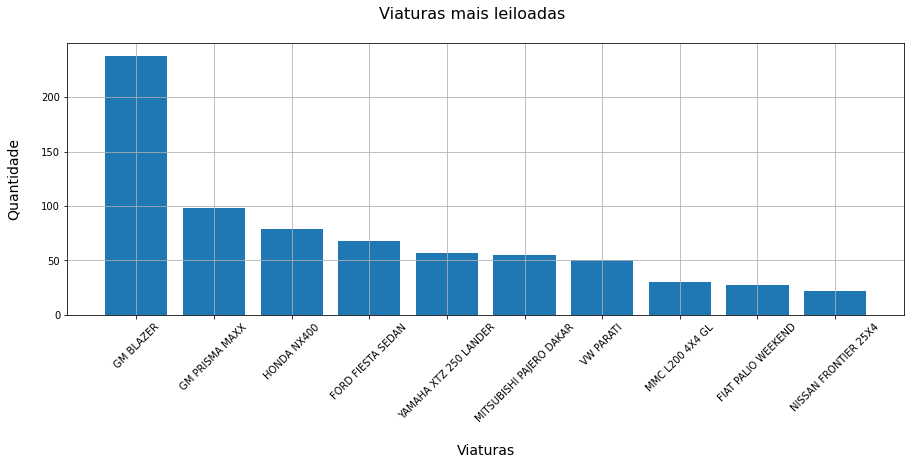

In [223]:
# Gera um gráfico dos {numero} modelos mais leiloados

numero = 10

modelo = leilao.marca_modelo.value_counts()[0:numero].index
qtd = list(leilao.marca_modelo.value_counts()[0:numero])

fig3 = plt.figure(figsize=(15,5))

ax = plt.subplot()

ax.bar(modelo, qtd)
ax.set_xlabel('Viaturas', labelpad=20, fontsize=14)
ax.set_ylabel('Quantidade', labelpad=20, fontsize=14)

plt.xticks(rotation=45)
plt.grid(True)
fig3.suptitle('Viaturas mais leiloadas', fontsize=16, );

In [224]:
# Faz o tratamento da placa remove '-DF'
leilao['placa'] = leilao.placa.apply(lambda x : x[:7])

In [225]:
leilao

,placa,data,marca_modelo,ano,lance_final,fipe
28,JKH3233,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5400,17270.0
29,JKH4973,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4800,17270.0
30,JKH0903,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5500,17270.0
31,JKH3993,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4500,17270.0
32,JKH3343,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5900,17270.0
...,...,...,...,...,...,...
380,JJU5371,2020-12-11,VW PARATI,2010,10500,23120.0
381,JJU5391,2020-12-11,VW PARATI,2010,11750,23120.0
382,JJU5411,2020-12-11,VW PARATI,2010,12250,23120.0
383,JJU9281,2020-12-11,VW PARATI,2010,10500,23120.0


Trata os atributos categoricos com o get_dummies

In [229]:
 # Calcula a idade em que foi vendida
 leilao['idade'] = pd.DatetimeIndex(leilao.data).year - leilao.ano

In [230]:
leilao

,placa,data,marca_modelo,ano,lance_final,fipe,idade
28,JKH3233,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5400,17270.0,13
29,JKH4973,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4800,17270.0,13
30,JKH0903,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5500,17270.0,13
31,JKH3993,2019-12-13,FIAT PÁLIO HLX FLEX,2006,4500,17270.0,13
32,JKH3343,2019-12-13,FIAT PÁLIO HLX FLEX,2006,5900,17270.0,13
...,...,...,...,...,...,...,...
380,JJU5371,2020-12-11,VW PARATI,2010,10500,23120.0,10
381,JJU5391,2020-12-11,VW PARATI,2010,11750,23120.0,10
382,JJU5411,2020-12-11,VW PARATI,2010,12250,23120.0,10
383,JJU9281,2020-12-11,VW PARATI,2010,10500,23120.0,10


In [227]:
pd.get_dummies(leilao.marca_modelo)

,FIAT PALIO WEEKEND,FIAT PÁLIO HLX FLEX,FORD FIESTA SEDAN,GM BLAZER,GM PRISMA MAXX,HONDA CB 600F- HORNET,HONDA NX400,MITSUBISHI PAJERO DAKAR,MMC L200 4X4 GL,NISAN FRONTIER 25X4,NISAN X TERRA,NISAN X TERRA,NISSAN FRONTIER 25X4,RENAULT LOGAN EXPRESSION,VW PARATI,YAMAHA XTZ 250 LANDER
28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [231]:
X = pd.concat([leilao[['idade', 'fipe']], pd.get_dummies(leilao.marca_modelo)], axis=1)

In [232]:
X

,idade,fipe,FIAT PALIO WEEKEND,FIAT PÁLIO HLX FLEX,FORD FIESTA SEDAN,GM BLAZER,GM PRISMA MAXX,HONDA CB 600F- HORNET,HONDA NX400,MITSUBISHI PAJERO DAKAR,MMC L200 4X4 GL,NISAN FRONTIER 25X4,NISAN X TERRA,NISAN X TERRA,NISSAN FRONTIER 25X4,RENAULT LOGAN EXPRESSION,VW PARATI,YAMAHA XTZ 250 LANDER
28,13,17270.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,13,17270.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,13,17270.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,13,17270.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,13,17270.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,10,23120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
381,10,23120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
382,10,23120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
383,10,23120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [233]:
y = leilao.lance_final

In [255]:
# X -> Variáveis previsoras [idade, fipe, modelo]
# y -> Target [lance_final]

# Separa parte dos dados para treinamento e parte parar validação
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=.20)

In [256]:
train_X.shape

(626, 18)

In [257]:
val_X.shape

(157, 18)

## Modelagem

In [261]:
# Criar modelo RandomForest 
modelo = RandomForestRegressor(random_state=1, n_estimators=240)

# Treinamento
modelo.fit(train_X, train_y)

# Previsão
previsao = modelo.predict(val_X)

# Medir acurácia
mae = mean_absolute_error(previsao, val_y)

In [262]:
print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

Validation MAE for Random Forest Model: 1,670
